In [1]:
%matplotlib inline

In [13]:
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import os,sys

thismodule = sys.modules[__name__]

In [6]:
print('import sonde data')

inputdir = '/Users/bfildier/Data/EUREC4A/merged/sondes'

radiosondes = xr.open_dataset(os.path.join(inputdir,'all_radiosondes.nc'))
dropsondes = xr.open_dataset(os.path.join(inputdir,'all_dropsondes.nc'))

import sonde data


In [23]:
radiosondes.lon.values.shape

(516, 3000)

In [38]:
print('get boundaries')

factor = 0.03

for key in 'lon','lat':
    for fun in 'min','max':
        
        # Get extremum coordinate
        setattr(thismodule,'%s%s'%(key,fun),getattr(np,'nan%s'%fun)(np.hstack([radiosondes[key].values.flatten(),dropsondes[key].values.flatten()])))
        
dlon = lonmax-lonmin
lonmin = lonmin - factor*dlon
lonmax = lonmax + factor*dlon
lon_c = (lonmin+lonmax)/2

dlat = latmax-latmin
latmin = latmin - factor*dlat
latmax = latmax + factor*dlat

lat_c = (latmin+latmax)/2

get boundaries


In [44]:
lonmin,lonmax,latmin,latmax

(-77.70727318864756,
 -14.078234835139035,
 5.693979205236637,
 44.859246022430476)

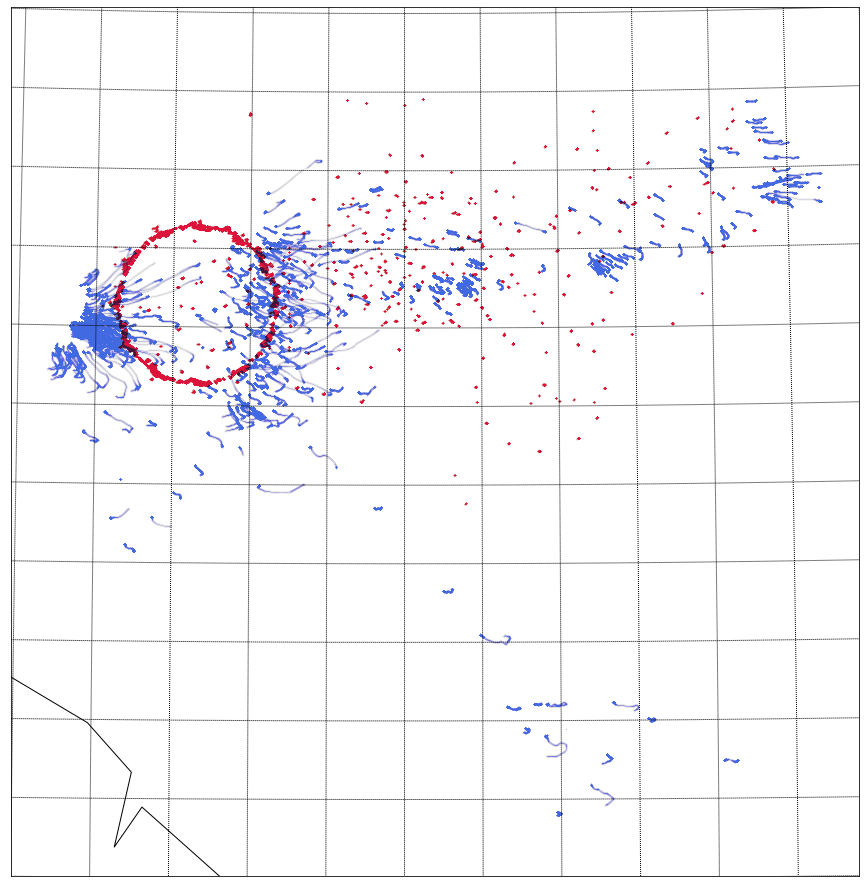

In [100]:
factor = 1.2

fig = plt.figure(figsize=(16,16))

map = Basemap(projection='tmerc',\
              llcrnrlon=-60,llcrnrlat=6,\
              urcrnrlon=-49,urcrnrlat=17,
              lat_0=11,lon_0=-55)
#               width=dlon*factor,height=dlat*factor)
map.drawcoastlines()

map.drawmeridians(range(300, 340, 1))
map.drawparallels(range(0, 30, 1))

x_ds,y_ds = map(dropsondes.lon.values.flatten(),dropsondes.lat.values.flatten())
x_rs,y_rs = map(radiosondes.lon.values.flatten(),radiosondes.lat.values.flatten())

map.scatter(x_ds,y_ds,marker='o',color='crimson',alpha=0.002,s=2)
map.scatter(x_rs,y_rs,marker='o',color='royalblue',alpha=0.002,s=2)

plt.show()

In [91]:
import cartopy.crs as ccrs
import cartopy

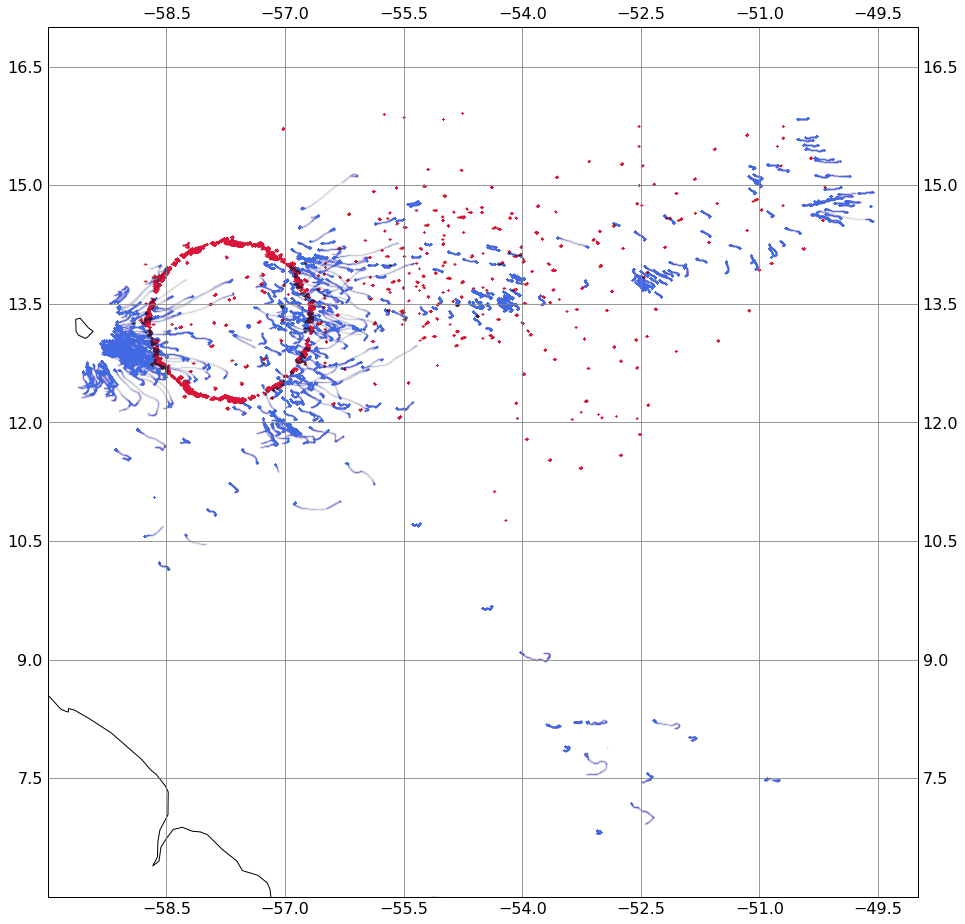

In [115]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(16,16))

ax.coastlines(resolution='50m')
ax.set_extent([-60,-49,6,17])
gl = ax.gridlines(color='Grey',draw_labels=True)
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

x_ds,y_ds = dropsondes.lon.values.flatten(),dropsondes.lat.values.flatten()
x_rs,y_rs = radiosondes.lon.values.flatten(),radiosondes.lat.values.flatten()

dm = ax.scatter(x_ds,y_ds,marker='o',color='crimson',alpha=0.002,s=3,label='Dropsondes')
rm = ax.scatter(x_rs,y_rs,marker='o',color='royalblue',alpha=0.002,s=3,label='Radiosondes')

# ax.legend(handles=[dm,rm],fontsize=18)

plt.savefig('dropsondes_and_radiosondes.png',bbox_inches='tight')
plt.show() 